Metrics saved to: d:\Standard\Projects\Physics_Simulator\project\metrics\emergence_metrics.csv


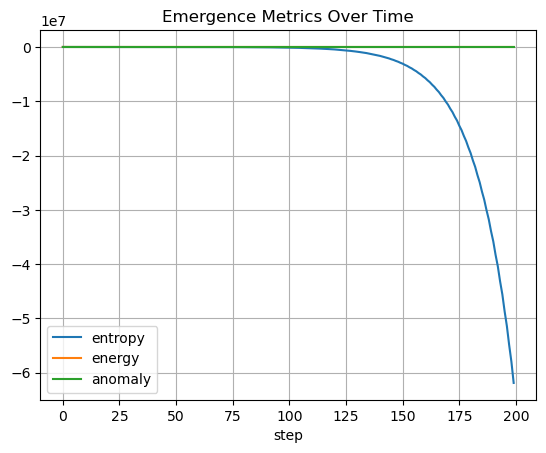

In [3]:
# metrics_logger.ipynb
# Log Emergence Metrics from the Simulator

import sys
import os
# Add the parent directory to the Python path to find emergent_simulator
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from emergent_simulator import initialize_grid, rule_diffusion

# --- Metric Functions ---
def compute_entropy(grid):
    hist = np.histogram(grid, bins=50, density=True)[0]
    hist = hist[hist > 0]
    return -np.sum(hist * np.log(hist))

def compute_energy(grid):
    return np.sum(grid**2)

def compute_anomaly(grid):
    return np.std(grid)

# --- Log Simulation Metrics ---
grid = initialize_grid()
steps = 200
logs = []

for t in range(steps):
    entropy = compute_entropy(grid)
    energy = compute_energy(grid)
    anomaly = compute_anomaly(grid)
    logs.append({"step": t, "entropy": entropy, "energy": energy, "anomaly": anomaly})
    grid = rule_diffusion(grid)

# --- Save Logs ---
df = pd.DataFrame(logs)
# Use absolute path for saving the CSV file
csv_path = os.path.join(os.path.dirname(os.getcwd()), "metrics", "emergence_metrics.csv")
df.to_csv(csv_path, index=False)
print(f"Metrics saved to: {csv_path}")

# --- Plot Metrics ---
df.plot(x="step", y=["entropy", "energy", "anomaly"], title="Emergence Metrics Over Time")
plt.grid(True)
plt.show()